In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from task_2_NER_ImgCls.utils.paths import TRAIN_DIR, VAL_DIR, TEST_DIR

In [10]:
categories = [d.name for d in TRAIN_DIR.iterdir() if d.is_dir()]

counts = []
for split_dir in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
    for category in categories:
        img_count = len(list((split_dir / category).glob("*")))
        counts.append((split_dir.name, category, img_count))

df = pd.DataFrame(counts, columns=["Split", "Category", "Count"])

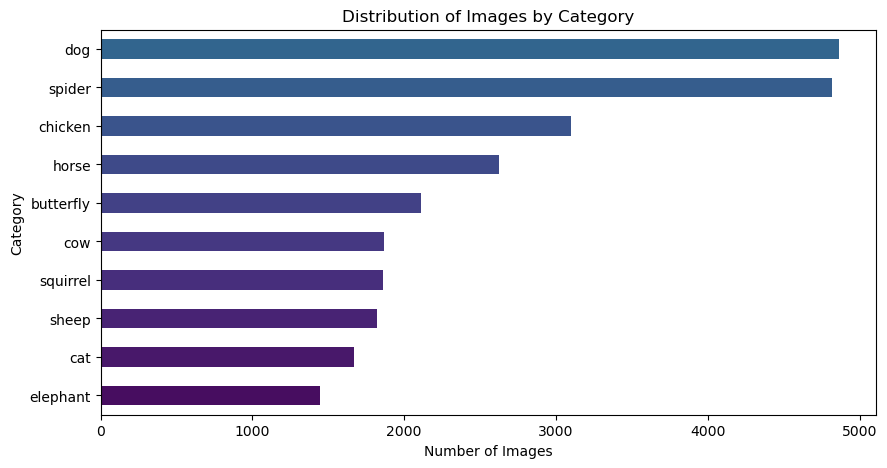

In [18]:
category_counts = df.groupby("Category")['Count'].sum()

plt.figure(figsize=(10, 5))
category_counts.sort_values().plot(kind="barh", color=sns.color_palette("viridis", len(df)))
plt.xlabel("Number of Images")
plt.ylabel("Category")
plt.title("Distribution of Images by Category")
plt.show()

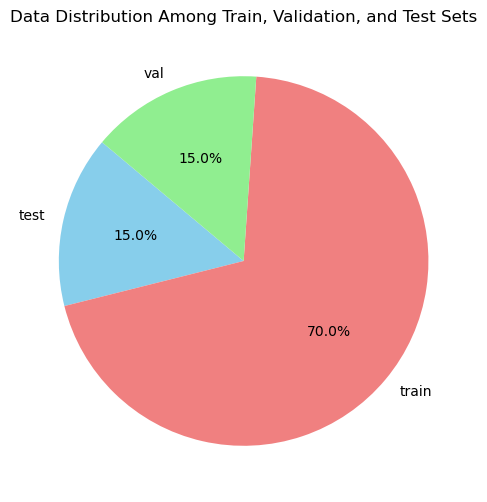

In [20]:
split_counts = df.groupby("Split")['Count'].sum()

plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Data Distribution Among Train, Validation, and Test Sets")
plt.show()

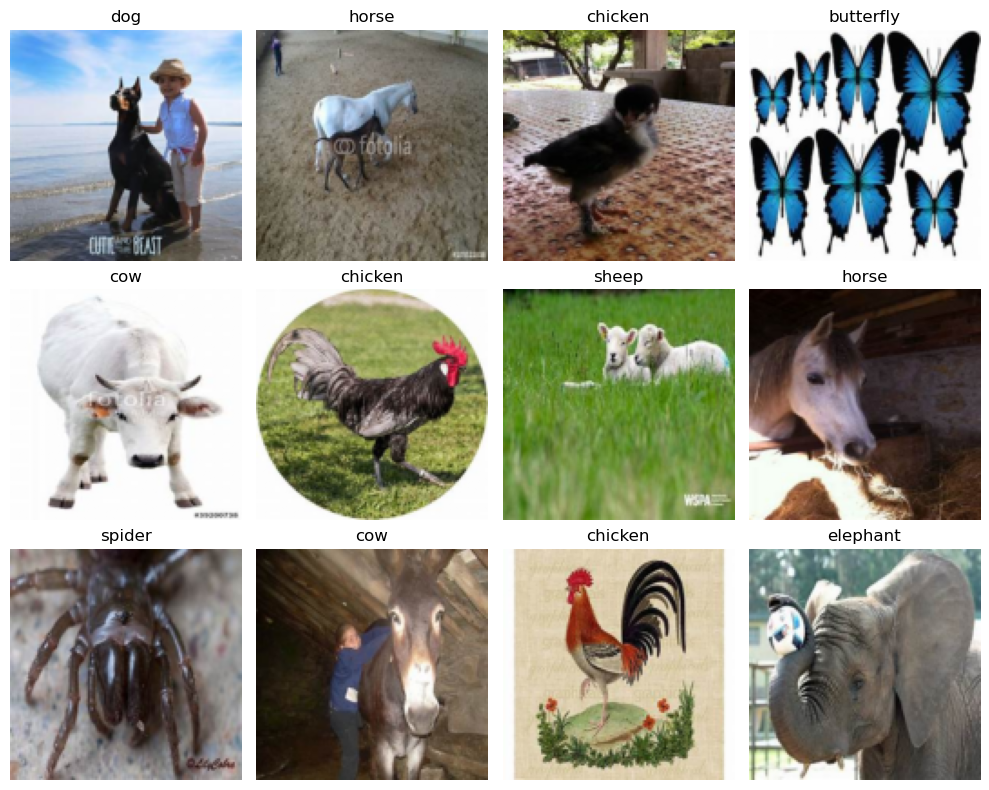

In [23]:
import random
from torchvision.datasets import ImageFolder
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])
dataset = ImageFolder(root=TEST_DIR, transform=transform)


random_indices = random.sample(range(len(dataset)), 12)
images, labels = zip(*[dataset[i] for i in random_indices])

class_names = dataset.classes

fig, axes = plt.subplots(3, 4, figsize=(10, 8))
for ax, img, label in zip(axes.flatten(), images, labels):
    ax.imshow(img.permute(1, 2, 0))
    ax.set_title(class_names[label])
    ax.axis("off")

plt.tight_layout()
plt.show()